<a href="https://colab.research.google.com/github/Luseat/PrediksiHargaSahamBBRI-RNN/blob/main/Prediksi_Harga_Saham_BBRI_tahun_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplfinance
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# mengambil dataset dari link raw github
url = "https://raw.githubusercontent.com/Luseat/PrediksiHargaSahamBBRI-RNN/refs/heads/main/BBRI.csv"
df = pd.read_csv(url)
df

df = yf.Ticker("BBRI.JK")
df = df.history(period="max")
df.tail()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-10 00:00:00+07:00,4000.0,4050.0,3950.0,3970.0,201999400,0.0,0.0
2025-02-11 00:00:00+07:00,3970.0,4040.0,3900.0,4010.0,276382800,0.0,0.0
2025-02-12 00:00:00+07:00,3960.0,4060.0,3950.0,4030.0,362571900,0.0,0.0
2025-02-13 00:00:00+07:00,4000.0,4030.0,3960.0,3990.0,341640600,0.0,0.0
2025-02-14 00:00:00+07:00,4000.0,4010.0,3850.0,3860.0,524909600,0.0,0.0


In [3]:
del df['Dividends']
del df['Stock Splits']


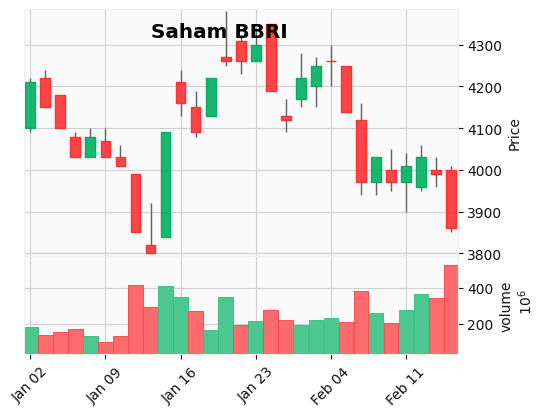

In [46]:
dfVisual = df.loc["2023-01-01":].copy()


mpf.plot(dfVisual, type='candle', style='yahoo', title='Saham BBRI',
         ylabel='Price', ylabel_lower='volume', figsize=(5,4),
         volume=True, tight_layout=True)

mpf.show()

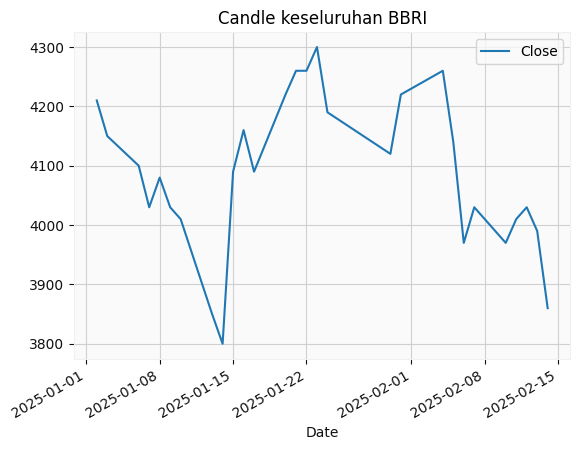

In [47]:
df.plot.line(y="Close", use_index=True)
plt.title("Candle keseluruhan BBRI")
plt.show()

In [48]:
df = df.loc["2020-01-01":].copy()

In [49]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

#Load data
prices = df['Close'].values.reshape(-1,1)

In [50]:
from re import T
#Normalkan Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)

# Data latih dan data uji
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [51]:
# Buat dataset tran dan test

def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        Y.append(data[i+lookback])
    return np.array(X), np.array(Y)

lookback = 10 #30 # (temporary)
train_X, train_Y = create_dataset(train_data, lookback)
test_X, test_Y = create_dataset(test_data, lookback)
# def create_dataset(data, time_steps=1):
#     X, Y = [], []
#     for i in range(len(data)-time_steps-1):
#         X.append(data[i:(i+time_steps), 0])
#         Y.append(data[i + time_steps, 0])
#     return np.array(X), np.array(Y)

In [52]:
# Ngebuild model RNN nya
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=32, input_shape=(lookback, 1)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(train_X, train_Y, epochs=50, batch_size=32) # Ngelatih modelnya

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7739
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5933
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4372
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3067
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2027
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1256
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0748
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0484
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0426
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0514
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0677
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0846
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0973
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1034
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1029
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/

In [21]:
# Melakukan prediksi
train_preds = model.predict(train_X)
test_preds = model.predict(test_X)

# Menormalkan kembali data
train_preds = scaler.inverse_transform(train_preds)
train_Y = scaler.inverse_transform(train_Y)
test_preds = scaler.inverse_transform(test_preds)
test_Y = scaler.inverse_transform(test_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [22]:
# Menghitung metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_Y, test_preds)
mae = mean_absolute_error(test_Y, test_preds)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 8881.77108407334
Mean Absolute Error (MAE): 72.98233192845395


In [53]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 4))
# plt.plot(prices[:train_size + lookback], label='Actual')
# plt.plot(range(lookback, train_size), train_preds, label='Train Predictions')
# plt.plot(range(train_size + lookback, len(prices)), test_preds, label='Predictions Price')
# plt.xlabel("Time")
# plt.ylabel("Price")
# plt.title("BBRI Stock Price Forecast")
# plt.legend()
# plt.show()

In [ ]:
# Mengambil periode yang sesuai untuk Test Predictions dan Actual
test_actual = prices[train_size + lookback:]

# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({'Harga Sebenarnya': test_actual.flatten(),
                              'Harga Prediksi': test_preds.flatten()})

comparison_df